In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('dark_background')

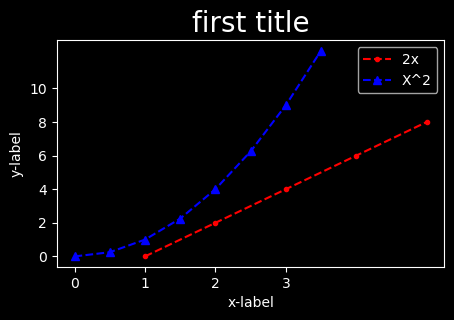

In [30]:
#plt.plot([1,2,3,4,5],[0,2,4,6,8],label='2x',color='red',linewidth=2,linestyle='--')
plt.figure(figsize=(5,3),dpi=100)
plt.plot([1,2,3,4,5],[0,2,4,6,8],'r.--',label='2x')
#fmt='[color][marker][line]'
##line two
x2=np.arange(0,4,0.5)
plt.plot(x2,x2**2,'b^--',label='X^2')

plt.title('first title',fontdict={'fontname':'Times Roman','fontsize':20})
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.xticks([0,1,2,3])
plt.yticks([0,2,4,6,8,10])
plt.legend()
plt.show()

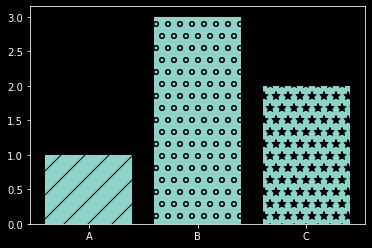

<Figure size 432x288 with 0 Axes>

In [43]:
#bar-chart
labels=['A','B','C']
values=[1,3,2]
bars=plt.bar(labels,values)
patterns=['/','o','*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))
    #bar.set_hatch(patterns[bar]) # not working
#bars[0].set_hatch('/')
#bars[1].set_hatch('o')
plt.figure(figsize=(6,4))
plt.show()

### Load Necessary Libraries

##### Download the data from https://www.kaggle.com/karangadiya/fifa19

###### line Graph

No handles with labels found to put in legend.
No handles with labels found to put in legend.


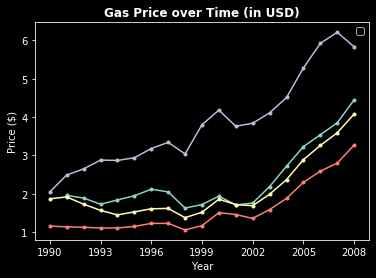

In [80]:

gas = pd.read_csv('gas_prices.csv')
#plt.figure(figsize=(4,5),dpi=200)
plt.title('Gas Price over Time (in USD)',fontdict={'fontweight':'bold'})
#plt.plot(gas.Year,gas.USA,'b.-',label='USA')
#plt.plot(gas.Year,gas.Canada,'r.-',label='Canada'),
#plt.plot(gas['Year'],gas['South Korea'],'g.-',label='South Korea')
#choose the specific countries
countries_to_look_at=['Australia','USA','Canada','South Korea']
for country in gas:
    if country in countries_to_look_at:
        plt.plot(gas['Year'],gas[country],marker='.')
plt.xticks(gas['Year'][::3])#for every three years
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.legend()
plt.legend(loc=0)
plt.show()


### Load Fifa data

In [81]:
fifa=pd.read_csv('fifa_data.csv')

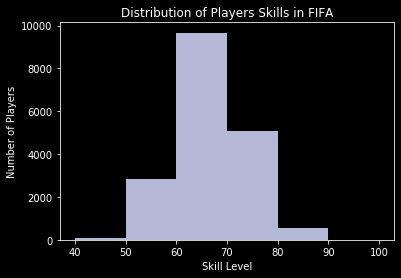

In [93]:
bins=[40,50,60,70,80,90,100]
plt.hist(fifa.Overall,bins=bins,color='#b4b8d6') # can also use fifa['Overall']
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Players Skills in FIFA')
plt.xticks(bins)
plt.show()

### Pie Chart

In [101]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [124]:
left=fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right=fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]

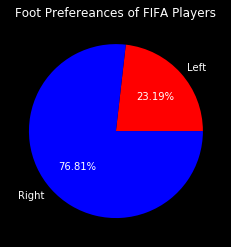

In [137]:
labels=['Left','Right']
colors=['r','b']
plt.pie([left,right],labels=labels,colors=colors,autopct='%.2f%%') #two % to show a percentage
plt.title('Foot Prefereances of FIFA Players')

plt.show()

41
2290
10876
4583
369


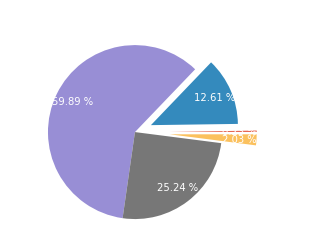

In [170]:
fifa.Weight #this gives the lbs appended 
fifa.Weight=[int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight] #Stripping the lbs and changing into integer values
light=fifa.loc[fifa.Weight<125].count()[0]
print(light)
light_medium=fifa.loc[(fifa.Weight>=125) &(fifa.Weight<150)].count()[0]
print(light_medium)
medium=fifa.loc[(fifa.Weight>=150) & (fifa.Weight<175)].count()[0]
print(medium)
medium_heavy=fifa.loc[(fifa.Weight>=175) & (fifa.Weight<200)].count()[0]
print(medium_heavy)
heavy=fifa.loc[fifa.Weight>=200].count()[0]
print(heavy)
weights=[light,light_medium,medium,medium_heavy,heavy]
labels=['Under 125', '125-150','150-175','175-200','Over 200']
explode=(.4,.2,0.,0.,.4) #taking apart the plots
plt.style.use('ggplot')
plt.pie(weights,labels=labels,autopct='%.2f %%',pctdistance=0.8,explode=explode)
plt.title('Weight of Fifa Players (lbs)')
plt.show()


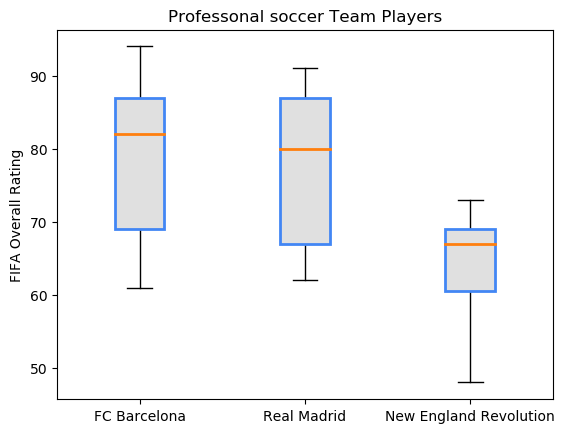

In [182]:
#comparign two teams
plt.style.use('default')
barcelona=fifa.loc[fifa.Club=='FC Barcelona']['Overall']
madrid=fifa.loc[fifa.Club=='Real Madrid']['Overall']
revs=fifa.loc[fifa.Club=='New England Revolution']['Overall']
labels=['FC Barcelona','Real Madrid','New England Revolution']
boxes=plt.boxplot([barcelona,madrid,revs],labels=labels,patch_artist=True, medianprops={'linewidth':2}) # patch is needed for the face color
for box in boxes['boxes']:
    #set edge color
    box.set(color='#4286f4',linewidth=2)
    #change fill color
    box.set(facecolor='#e0e0e0')
plt.title('Professonal soccer Team Players')
plt.ylabel('FIFA Overall Rating')
plt.show()